Dataset : https://www.kaggle.com/datasets/kiranchowdary/india-odi-history

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/third year/sem5/fundamentals of data science/file_cricket.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0,Index,Date,Series,Ground,result
0,0,1,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets
1,1,2,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets
2,2,3,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs
3,3,4,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets
4,4,5,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets


In [ ]:
df.shape

(993, 6)

## Data Cleaning

In [ ]:
df.drop(columns=["Unnamed: 0" , "Index"],axis=1,inplace=True)

In [ ]:
df.head()

,Date,Series,Ground,result
0,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets
1,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets
2,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs
3,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets
4,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets


## Feature Enginnering

In [ ]:
df["Day"] = df["Date"].str.split("/").str[0]
df["Month"] = df["Date"].str.split("/").str[1]
df["Year"] = df["Date"].str.split("/").str[2]

In [ ]:
df.head()

,Date,Series,Ground,result,Day,Month,Year
0,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,13,07,1974
1,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,15,07,1974
2,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,07,06,1975
3,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,06,1975
4,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,14,06,1975


In [ ]:
df["Opponent"] = df["Series"].str.split("v.").str[1]
df["Opponent"] = df["Opponent"].str.split(")").str[0]
df['Opponent'] = df['Series'].apply(
    lambda x: x.split('v.')[0].strip().split(' ')[-1] if 'v. India' in x else x.split('v.')[1].strip() if 'v.' in x else x
)

df.tail()

,Date,Series,Ground,result,Day,Month,Year,Opponent
988,29/11/2020,2020-2021 Australia v. India,Sydney Cricket Ground,Australia won by 51 runs,29,11,2020,Australia
989,02/12/2020,2020-2021 Australia v. India,Manuka Oval,India won by 13 runs,02,12,2020,Australia
990,23/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 66 runs,23,03,2021,England
991,26/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,England won by 6 wickets,26,03,2021,England
992,28/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 7 runs,28,03,2021,England


In [ ]:
df["Opponent"] = df["Opponent"].str.split(")").str[0]
df["Opponent"].unique()

array(['England', 'East Africa', 'New Zealand', 'Zealand', 'Pakistan',
       'West Indies', 'Sri Lanka', 'Australia', 'Indies', 'Zimbabwe',
       'Lanka', 'Bangladesh', 'South Africa', 'Africa',
       'United Arab Emirates', 'Kenya', 'Netherlands', 'Namibia',
       'Bermuda', 'Ireland', 'Scotland', 'Hong Kong', 'Afghanistan'],
      dtype=object)

In [ ]:
df["Opponent"] = df["Opponent"].replace("Lanka" , "Sri Lanka")
df["Opponent"] = df["Opponent"].replace("Zealand" , "New Zealand")
df["Opponent"] = df["Opponent"].replace("Indies" , "West Indies")
df["Opponent"] = df["Opponent"].replace("England" , "Eng")
df["Opponent"] = df["Opponent"].replace("Australia" , "Aus")
df["Opponent"] = df["Opponent"].replace("South Africa" , "S Africa")
df["Opponent"] = df["Opponent"].replace("Africa" , "S Africa")
df["Opponent"] = df["Opponent"].replace("Afghanistan" , "Afghan")
df["Opponent"] = df["Opponent"].replace("Bangladesh" , "Ban")
df["Opponent"] = df["Opponent"].replace("Zimbabwe" , "Zim")
df["Opponent"] = df["Opponent"].replace("Scotland" , "SCO")
df["Opponent"] = df["Opponent"].replace("Ireland" , "IRE")
df["Opponent"] = df["Opponent"].replace("Netherlands" , "NED")
df["Opponent"] = df["Opponent"].replace("Namibia" , "NAM")
df["Opponent"] = df["Opponent"].replace("East Africa" , "E Africa")
df["Opponent"] = df["Opponent"].replace("Sri Lanka" , "SL")
df["Opponent"] = df["Opponent"].replace("New Zealand" , "NZ")
df["Opponent"] = df["Opponent"].replace("West Indies" , "WI")
df["Opponent"] = df["Opponent"].replace("United Arab Emirates" , "UAE")

df["Opponent"].unique()

array(['Eng', 'E Africa', 'NZ', 'Pakistan', 'WI', 'SL', 'Aus', 'Zim',
       'Ban', 'S Africa', 'UAE', 'Kenya', 'NED', 'NAM', 'Bermuda', 'IRE',
       'SCO', 'Hong Kong', 'Afghan'], dtype=object)

In [ ]:
df["Ground"].unique()

array(['Headingley', 'Kennington Oval', "Lord's", 'Old Trafford',
       'AMI Stadium', 'Eden Park', 'Ayub National Stadium',
       'Jinnah Stadium (Sialkot)', 'Zafar Ali (Sahiwal) Stadium',
       'Edgbaston', 'Melbourne Cricket Ground', 'WACA Ground',
       'Sydney Cricket Ground', 'Brisbane Cricket Ground',
       'Adelaide Oval', 'Seddon Park', 'Sardar Vallabhai Patel Stadium',
       'Gandhi Stadium', 'Barabati Stadium',
       'Gandhi Sports Complex Ground', 'Arun Jaitley Stadium',
       'M Chinnaswamy Stadium', 'Jinnah Stadium (Gujwranwala)',
       'Ibn-e-Qasim Bagh Stadium', 'Gaddafi Stadium',
       'National Stadium (Karachi)', "Queen's Park Oval",
       'Albion Sports Complex', "Queen's Park (Old)", 'Grace Road',
       'Trent Bridge', 'Nevill Ground', 'County Ground (Chelmsford)',
       'Lal Bahadur Shastri Stadium', 'Sawai Mansingh Stadium',
       'Sher-I-Kashmir Stadium', 'Moti Bagh Stadium',
       'Nehru Stadium (Indore)', 'Keenan Stadium',
       'Nehru Stadium 

In [ ]:
df['Ground'].value_counts()

,count
Ground,
Sharjah Cricket Stadium,72
R Premadasa Stadium,43
Shere Bangla National Stadium,22
Sydney Cricket Ground,22
Melbourne Cricket Ground,22
...,...
Galle International Stadium,1
County Ground (Chelmsford),1
Indira Gandhi Stadium,1


India has played most matches on Sharjah Cricket Stadium

In [ ]:
L = [
    "M Chinnaswamy Stadium",
    "Arun Jaitley Stadium",
    "Eden Gardens",
    "Wankhede Stadium",
    "MA Chidambaram Stadium",
    "Narendra Modi Stadium",
    "Sardar Vallabhai Patel Stadium",
    "Lal Bahadur Shastri Stadium",
    "Sharjah Cricket Stadium",
    "Nehru Stadium (Indore)",
    "Nehru Stadium (Guwahati)",
    "Nehru Stadium (Kochi)",
    "Nehru Stadium (Pune)",
    "Vidarbha Cricket Association Ground",
    "Vidarbha Cricket Association Stadium",
    "Himachal Pradesh Cricket Association Stadium",
    "Maharashtra Cricket Association Stadium",
    "Holkar Cricket Stadium",
    "Gaddafi Stadium",
    "Sardar Vallabhai Patel Stadium"
]

df["GroundLocation"] = df["Ground"].isin(L).replace(True,"Home").replace(False,"Away")

In [ ]:
df.head()

,Date,Series,Ground,result,Day,Month,Year,Opponent,GroundLocation
0,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,13,07,1974,Eng,Away
1,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,15,07,1974,Eng,Away
2,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,07,06,1975,Eng,Away
3,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,06,1975,E Africa,Away
4,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,14,06,1975,NZ,Away


In [ ]:
df.tail()

,Date,Series,Ground,result,Day,Month,Year,Opponent,GroundLocation
988,29/11/2020,2020-2021 Australia v. India,Sydney Cricket Ground,Australia won by 51 runs,29,11,2020,Aus,Away
989,02/12/2020,2020-2021 Australia v. India,Manuka Oval,India won by 13 runs,02,12,2020,Aus,Away
990,23/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 66 runs,23,03,2021,Eng,Home
991,26/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,England won by 6 wickets,26,03,2021,Eng,Home
992,28/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 7 runs,28,03,2021,Eng,Home


In [ ]:
df["outcome"] = df["result"].str.contains("India won").replace(True,"Win").replace(False,"Loss")

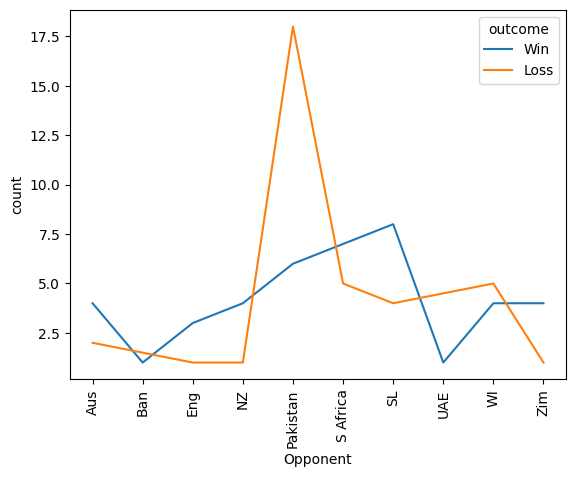

In [ ]:
matches_sharjah = df[df["Ground"]=="Sharjah Cricket Stadium"]
matches_sharjah = matches_sharjah.groupby("Opponent")["outcome"].value_counts().reset_index()
sns.lineplot(x=matches_sharjah["Opponent"] , y=matches_sharjah["count"] , hue=matches_sharjah["outcome"])
plt.xticks(rotation=90)
plt.show()

It is quite clearly evident that Pakistan has the upper-hand on India while playing at Sharjah Stadium.There was also allegations of some kind of cheating or biasness towards India to Loss.

In [ ]:
df.head()

,Date,Series,Ground,result,Day,Month,Year,Opponent,GroundLocation,outcome
0,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,13,07,1974,Eng,Away,Loss
1,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,15,07,1974,Eng,Away,Loss
2,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,07,06,1975,Eng,Away,Loss
3,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,06,1975,E Africa,Away,Win
4,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,14,06,1975,NZ,Away,Loss


In [ ]:
def determine_first_innings(result):
    if "India won" in result and "runs" in result:
        return "Bat"
    elif "wicket" in result and "India" not in result:
        return "Bat"
    else:
        return "Bowl"  # Replace with desired value for other cases

# Apply the function to the "result" column
df["First Innings"] = df["result"].apply(determine_first_innings)

In [ ]:
df.head()

,Date,Series,Ground,result,Day,Month,Year,Opponent,GroundLocation,outcome,First Innings
0,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,13,07,1974,Eng,Away,Loss,Bat
1,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,15,07,1974,Eng,Away,Loss,Bat
2,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,07,06,1975,Eng,Away,Loss,Bowl
3,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,06,1975,E Africa,Away,Win,Bowl
4,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,14,06,1975,NZ,Away,Loss,Bat


## Data Transformation

In [ ]:
df0 = df[["Year" , "First Innings" , "GroundLocation" , "outcome" , "Opponent"]]

In [ ]:
df0.head()

,Year,First Innings,GroundLocation,outcome,Opponent
0,1974,Bat,Away,Loss,Eng
1,1974,Bat,Away,Loss,Eng
2,1975,Bowl,Away,Loss,Eng
3,1975,Bowl,Away,Win,E Africa
4,1975,Bat,Away,Loss,NZ


In [ ]:

bins = [1970, 1984 , 1997 , 2006 , 2015 , 2021]
labels = [1,2, 3, 4 , 5 ]
df0['Year'] = pd.to_numeric(df0['Year'], errors='coerce')
df0['Year_binned'] = pd.cut(df0['Year'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df0["outcome"] = df0["outcome"].replace("Win" , 1)
df0["outcome"] = df0["outcome"].replace("Loss" , 0)
df0["First Innings"] = df0["First Innings"].replace("Bat" , 1)
df0["First Innings"] = df0["First Innings"].replace("Bowl" , 0)
df0["GroundLocation"] = df0["GroundLocation"].replace("Home" , 1)
df0["GroundLocation"] = df0["GroundLocation"].replace("Away" , 0)

In [ ]:
df0.head()

,Year,First Innings,GroundLocation,outcome,Opponent,Year_binned
0,1974,1,0,0,Eng,1
1,1974,1,0,0,Eng,1
2,1975,0,0,0,Eng,1
3,1975,0,0,1,E Africa,1
4,1975,1,0,0,NZ,1


# Data Analysis

In [ ]:
print(df0.info())
print(df0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            993 non-null    int64   
 1   First Innings   993 non-null    int64   
 2   GroundLocation  993 non-null    int64   
 3   outcome         993 non-null    int64   
 4   Opponent        993 non-null    object  
 5   Year_binned     993 non-null    category
dtypes: category(1), int64(4), object(1)
memory usage: 40.1+ KB
None
              Year  First Innings  GroundLocation     outcome
count   993.000000     993.000000      993.000000  993.000000
mean   2001.517623       0.441088        0.265861    0.519637
std      10.657703       0.496767        0.442013    0.499866
min    1974.000000       0.000000        0.000000    0.000000
25%    1994.000000       0.000000        0.000000    0.000000
50%    2002.000000       0.000000        0.000000    1.000000
75%    2010.000000       

In [ ]:

df0.pivot_table("outcome" , index="Year_binned" , columns="Opponent" , aggfunc="mean")

Opponent,Afghan,Aus,Ban,Bermuda,E Africa,Eng,Hong Kong,IRE,Kenya,NAM,NED,NZ,Pakistan,S Africa,SCO,SL,UAE,WI,Zim
Year_binned,,,,,,,,,,,,,,,,,,,
1,NaN,0.166667,NaN,NaN,1.0,0.272727,NaN,NaN,NaN,NaN,NaN,0.181818,0.416667,NaN,NaN,0.800000,NaN,0.250000,1.000000
2,NaN,0.457143,1.000000,NaN,NaN,0.454545,NaN,NaN,1.000000,NaN,NaN,0.709677,0.320000,0.296296,NaN,0.468085,1.0,0.363636,0.714286
3,NaN,0.250000,0.900000,NaN,NaN,0.680000,NaN,NaN,0.833333,1.0,1.0,0.363636,0.413043,0.370370,NaN,0.552632,1.0,0.433333,0.818182
4,1.0,0.371429,0.722222,1.0,NaN,0.571429,1.0,1.0,NaN,NaN,1.0,0.555556,0.578947,0.454545,1.0,0.610169,1.0,0.700000,0.818182
5,0.5,0.520000,1.000000,NaN,NaN,0.500000,1.0,NaN,NaN,NaN,NaN,0.529412,0.800000,0.875000,NaN,0.800000,NaN,0.647059,1.000000


In [ ]:
df0.pivot_table(index="Year_binned" , columns="Opponent" , aggfunc="size")

Opponent,Afghan,Aus,Ban,Bermuda,E Africa,Eng,Hong Kong,IRE,Kenya,NAM,NED,NZ,Pakistan,S Africa,SCO,SL,UAE,WI,Zim
Year_binned,,,,,,,,,,,,,,,,,,,
1,0,12,0,0,1,11,0,0,0,0,0,11,12,0,0,5,0,12,2
2,0,35,4,0,0,22,0,0,1,0,0,31,50,27,0,47,1,44,14
3,0,36,10,0,0,25,0,0,12,1,1,33,46,27,0,38,1,30,33
4,1,35,18,1,0,35,1,3,0,0,1,18,19,22,1,59,1,30,11
5,2,25,4,0,0,10,1,0,0,0,0,17,5,8,0,10,0,17,3


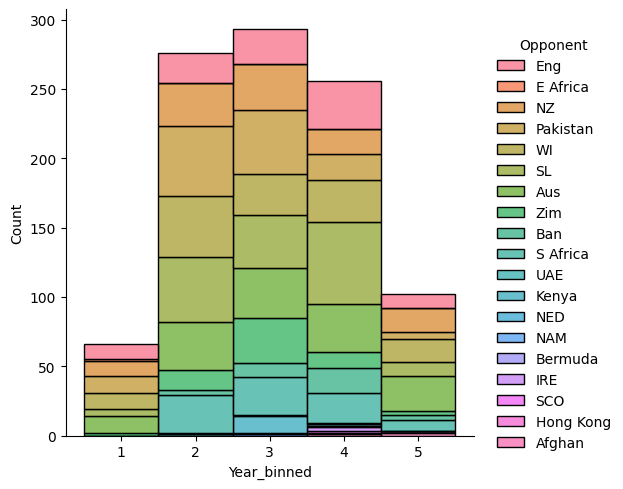

In [ ]:
import seaborn as sns
sns.displot(data = df0 , x = "Year_binned" , hue="Opponent" , multiple ="stack")

[]

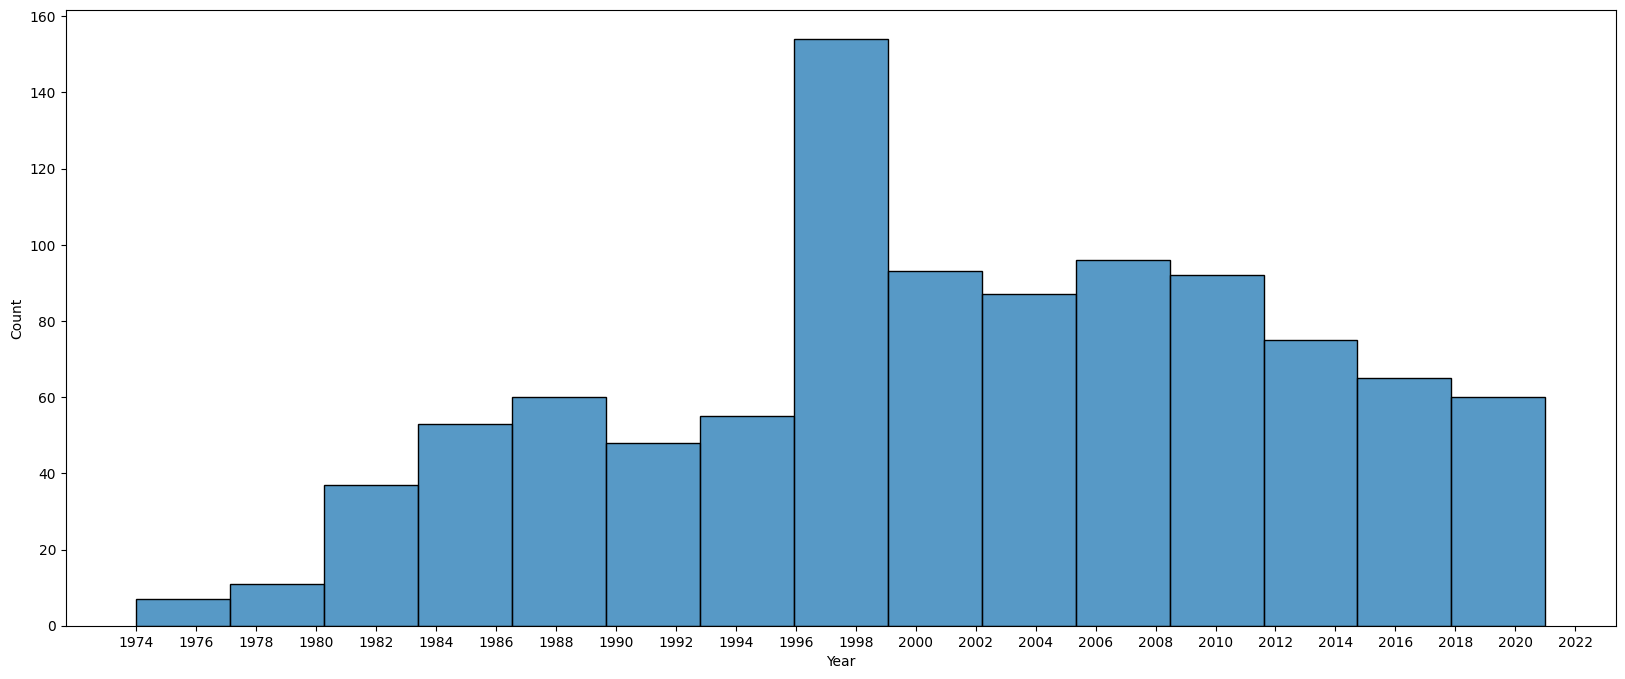

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data = df0 , x = "Year"  )
plt.xticks(ticks=range(1974 ,2023 , 2))
plt.plot()

 **As we see with the help of histplot that India witness a high rise in the number ODI matches from 1996 to 1999 <br>
 The popularity of T-20 format is also quite evident with the decreasing number of ODI matches from 2010**

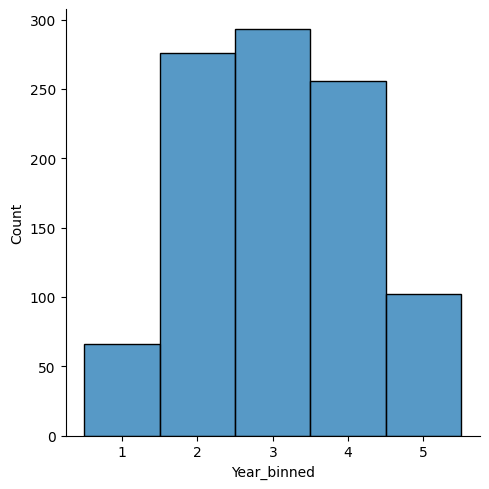

In [ ]:
sns.displot(data = df0 , x = "Year_binned"  )

Text(0.5, 1.0, 'Match Count Distribution Across Opponents Over Time')

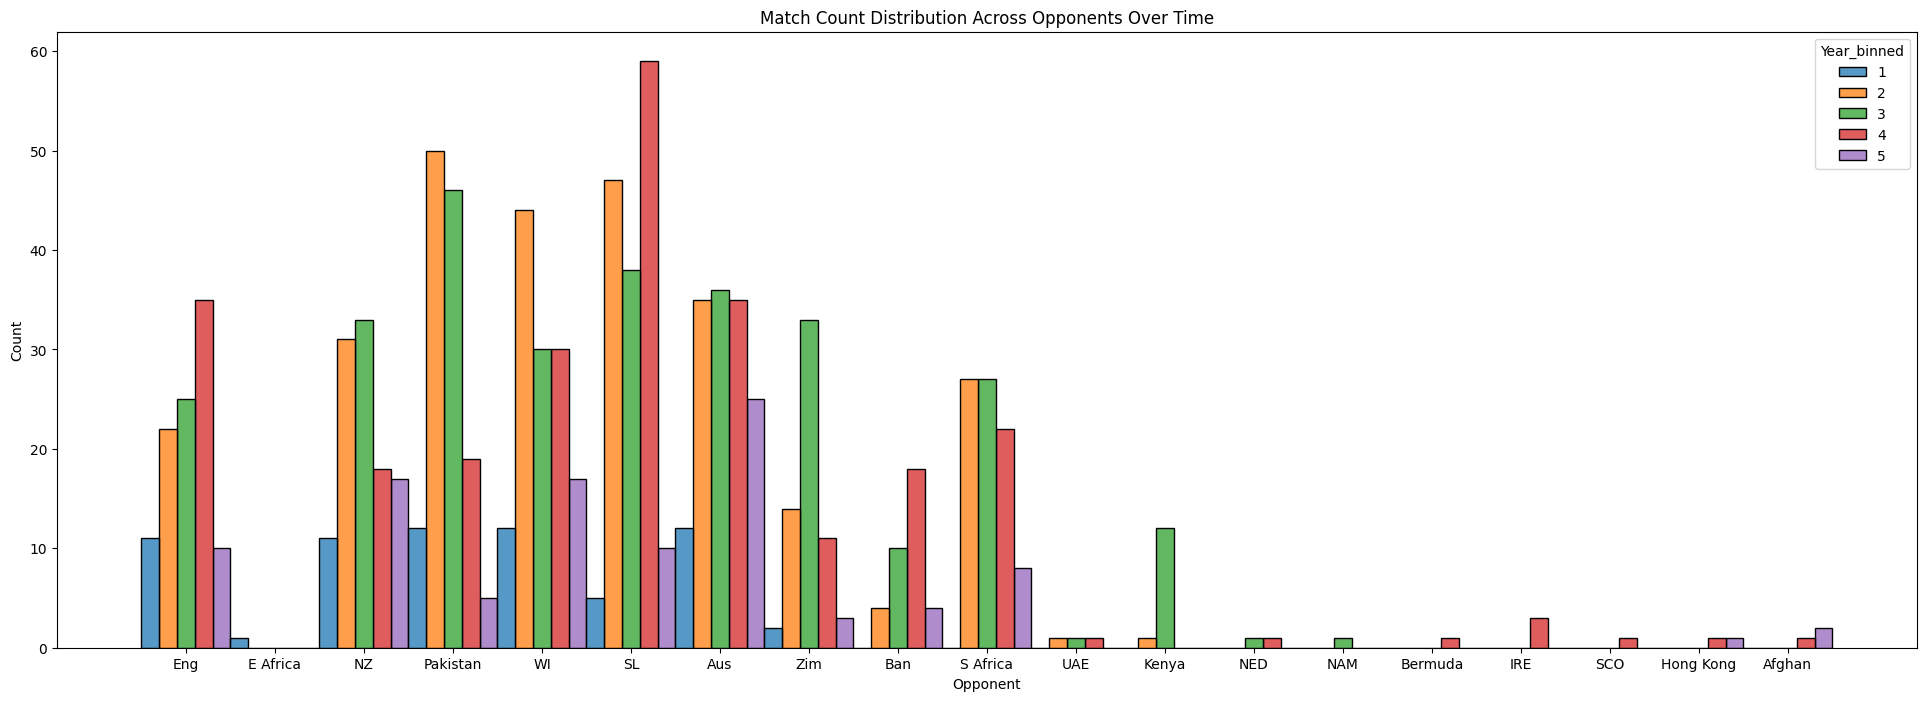

In [ ]:
plt.figure(figsize=(24, 8))
sns.histplot(x="Opponent" , hue="Year_binned" , data=df0 , multiple="dodge")
plt.title("Match Count Distribution Across Opponents Over Time")

**The graph provides a comprehensive overview of India’s ODI cricket matches against various opponents from 1970 to 2021, segmented into five time bins. Initially, from 1970 to 1984 (bin 1), India predominantly played against traditional cricketing nations like England and Pakistan, reflecting the early stages of India’s international cricket journey. The match count during this period was relatively low, indicating fewer international fixtures.**

**From 1985 to 1997 (bin 2), there is a noticeable increase in the number of matches, particularly against teams like West Indies and Sri Lanka. This period marks India’s growing presence in international cricket, with more frequent engagements against a broader range of opponents.**

**The period from 1998 to 2006 (bin 3) shows a significant rise in matches against Australia and Sri Lanka, highlighting the competitive nature of these encounters. This era coincides with India’s increasing competitiveness and the establishment of more regular international tours.**

**From 2007 to 2015 (bin 4), the data indicates a further increase in matches, especially against Australia and South Africa. This period reflects India’s robust cricketing calendar and its status as a major cricketing nation.**

**Finally, from 2016 to 2021 (bin 5), the graph shows a continued high frequency of matches against top teams like Australia and England, underscoring India’s sustained prominence in international cricket.**

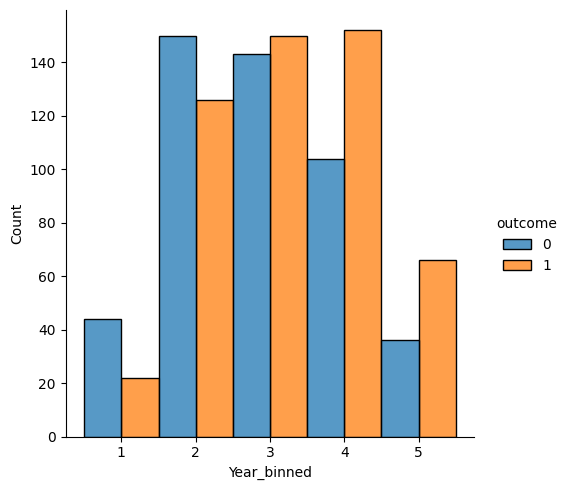

In [ ]:
sns.displot(data = df0 , x = "Year_binned" , hue="outcome" , multiple ="dodge")

Text(0.5, 1.0, 'Win/Loss Count  Distribution Across Opponents Over Time')

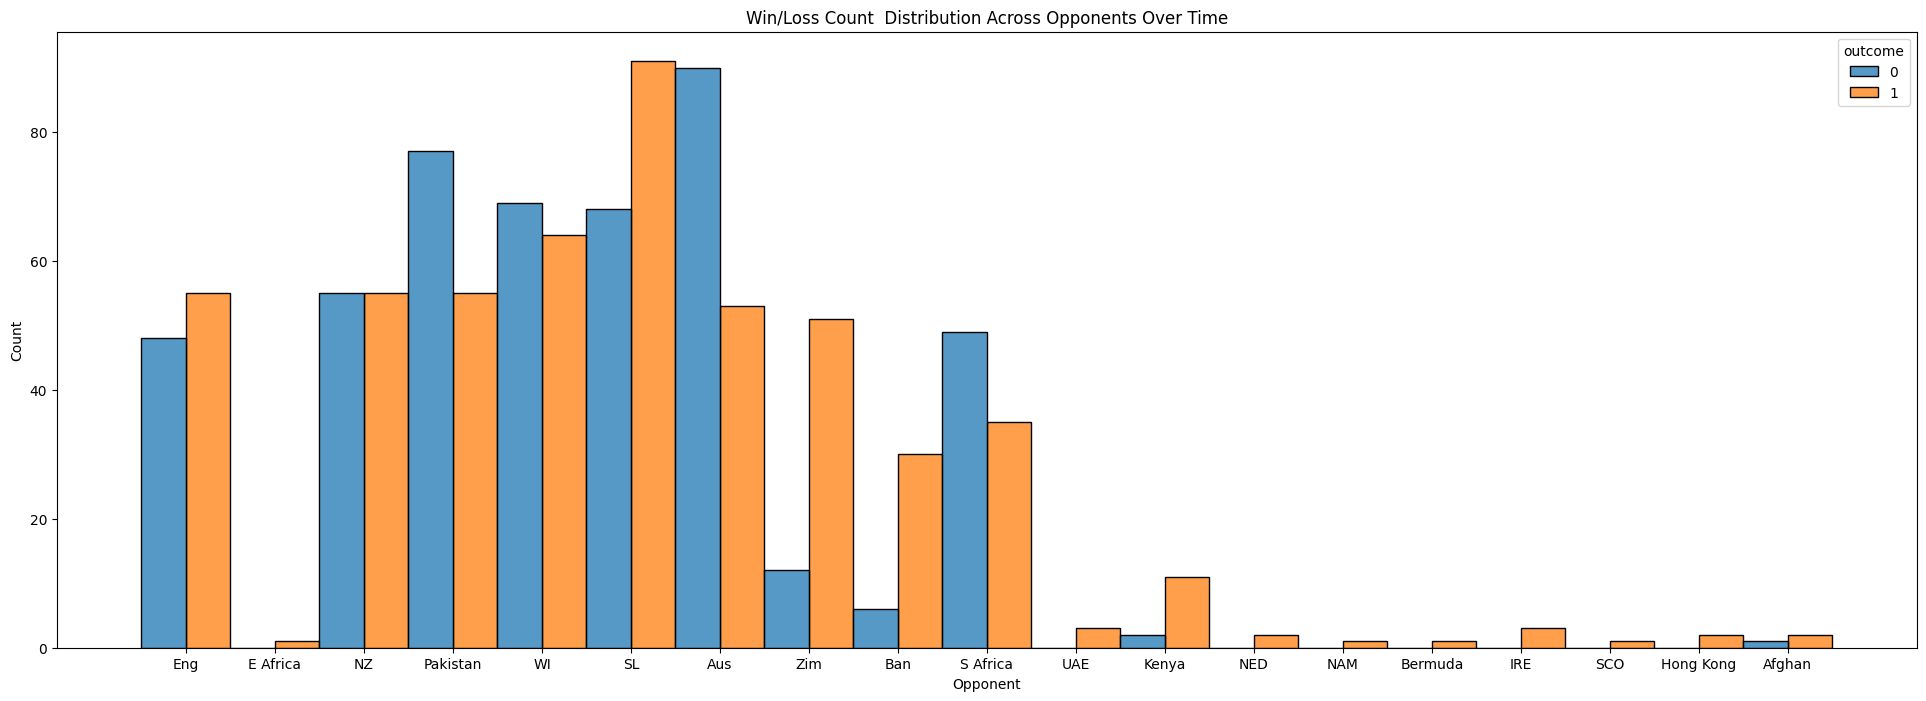

In [ ]:
plt.figure(figsize=(24, 8))
sns.histplot(data = df0 , x = "Opponent" , hue="outcome" , multiple ="dodge")
plt.title("Win/Loss Count  Distribution Across Opponents Over Time")

**The graph “Win/Loss Count Distribution Across Opponents Over Time” provides a detailed view of India’s performance in ODI cricket against various opponents. The blue bars represent wins, while the orange bars represent losses.**

**From the data, it is evident that India has had a strong performance against teams like Zimbabwe, Bangladesh, and Kenya, with a higher count of wins compared to losses. This indicates India’s dominance over these teams. Conversely, the matches against stronger teams like Australia and South Africa show a more balanced distribution of wins and losses, reflecting the competitive nature of these encounters.**

**Interestingly, the data also highlights India’s improved performance over time. In earlier years, the win/loss ratio against teams like England and Pakistan was more balanced, but in recent years, the number of wins has increased, suggesting an overall improvement in India’s cricketing prowess.**

**The graph also shows that India has played fewer matches against newer teams like Afghanistan and Hong Kong, but the win count is relatively high, indicating successful encounters. Overall, the data underscores India’s growing strength and consistency in ODI cricket, with notable improvements against traditionally strong opponents.**

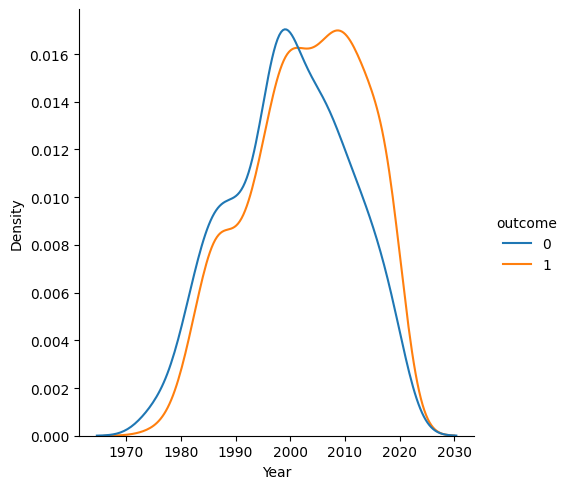

In [ ]:
sns.displot(data = df0 , x = "Year" , hue="outcome"  , kind="kde")

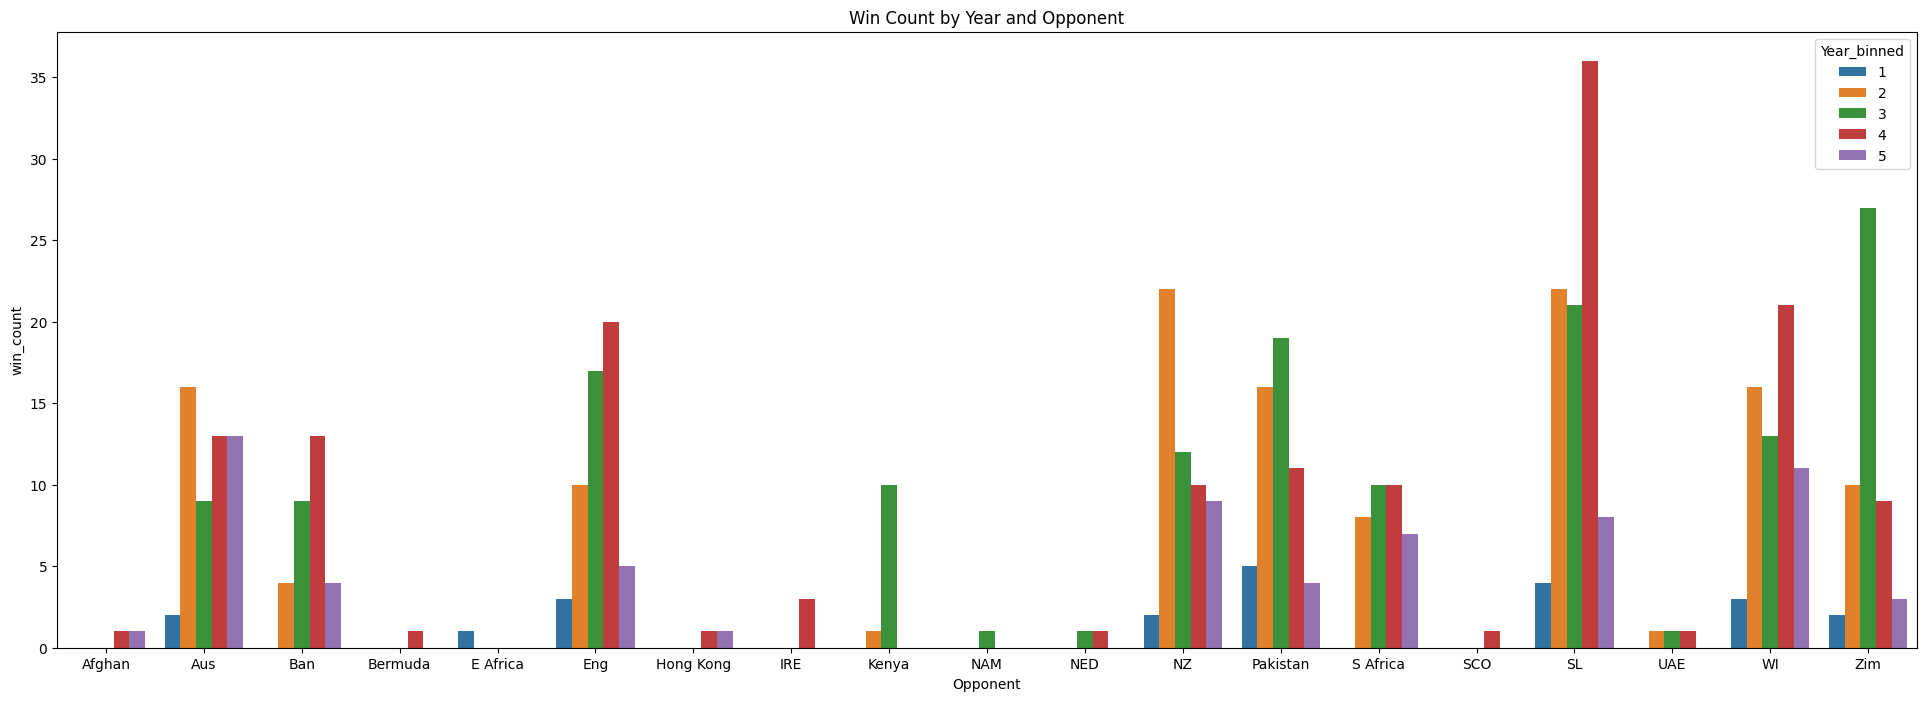

In [ ]:
plt.figure(figsize=(24, 8))
win_count_by_year_and_opponent = df0.groupby(["Year_binned" , "Opponent"])["outcome"].sum().reset_index()
win_count_by_year_and_opponent.rename(columns={"outcome": "win_count"}, inplace=True)
sns.barplot(data= win_count_by_year_and_opponent  , x="Opponent" , y="win_count" , hue="Year_binned")
plt.title("Win Count by Year and Opponent")
plt.show()

Dominance Against Certain Opponents: India has consistently dominated certain teams throughout the analyzed periods. Notably, Pakistan, Sri Lanka, and Australia have been frequent targets of India's victories. This suggests a strong historical rivalry and perhaps tactical advantages against these teams.<br>
Performance Fluctuations: While there are clear patterns of dominance, India's performance has varied across different time periods. For instance, in the earlier years (bins 1 and 2), victories against certain opponents might have been less frequent compared to later periods. This could be attributed to factors such as team composition, playing conditions, and evolving cricketing strategies.<br>
Emerging Trends: The graph also highlights emerging trends, particularly in recent years (bins 4 and 5). India's success against associate members has increased, indicating a growing dominance in international cricket. This could be a result of improved cricketing infrastructure, development programs, and a stronger talent pool in these regions.

In [ ]:
win_perc_by_year_and_opponent = df0.groupby(["Year_binned" , "Opponent"])["outcome"].mean().reset_index()

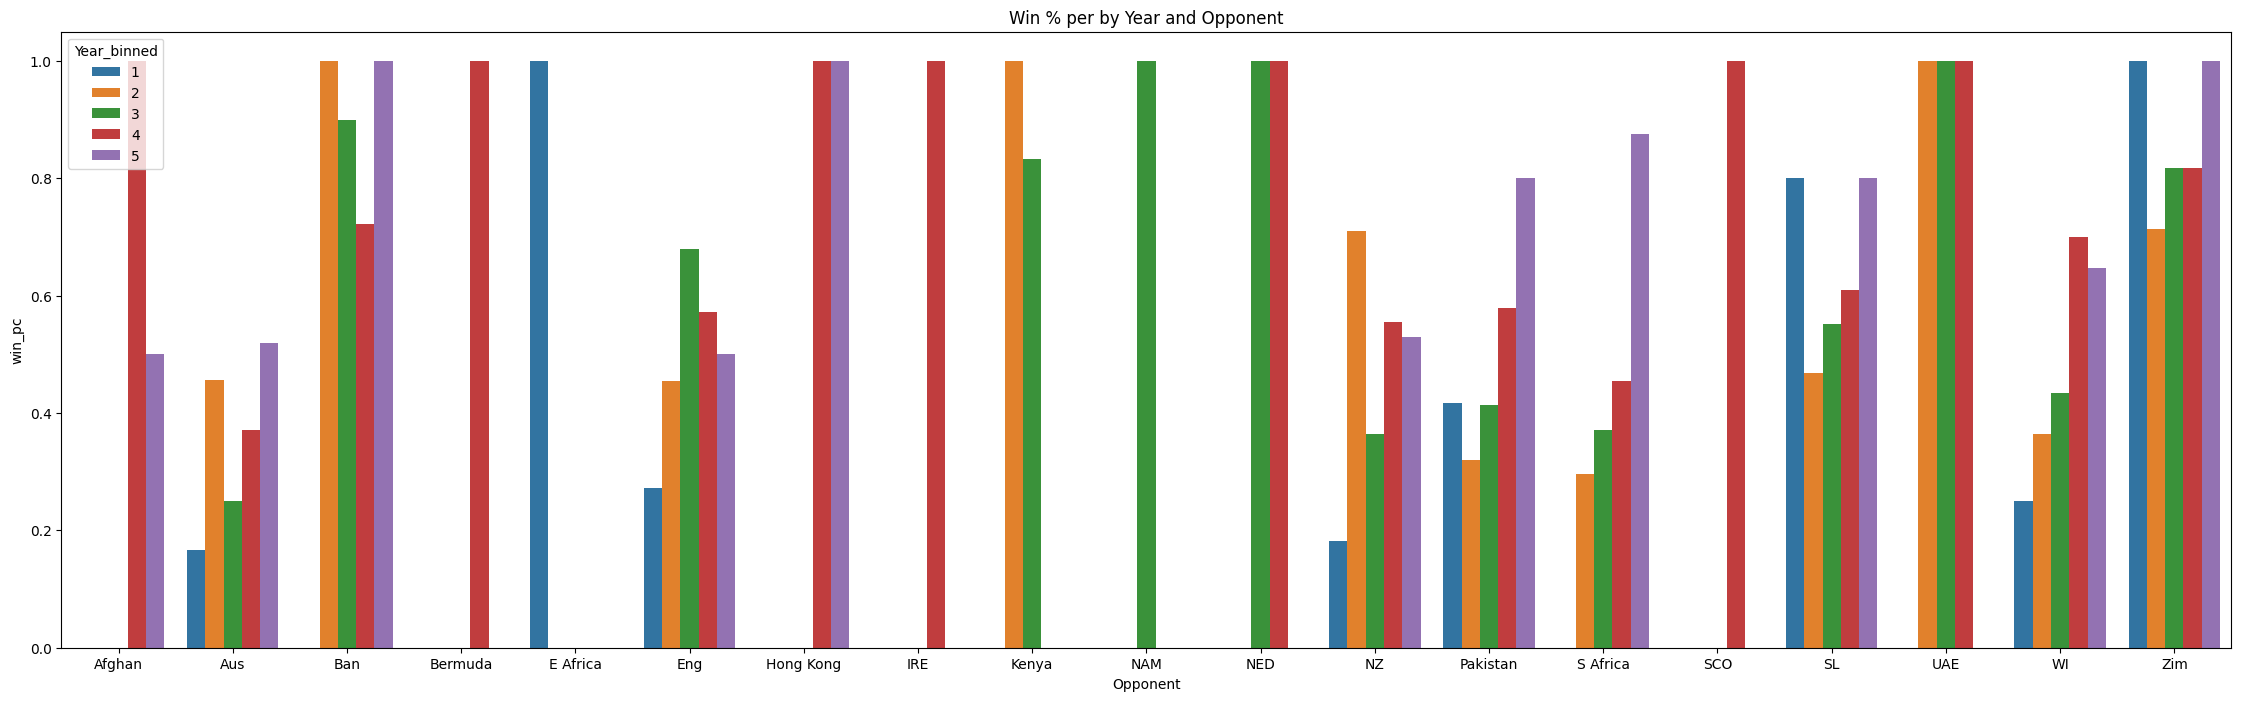

In [ ]:
plt.figure(figsize=(28, 8))
win_perc_by_year_and_opponent.rename(columns={"outcome": "win_pc"}, inplace=True)
sns.barplot(data= win_perc_by_year_and_opponent , x="Opponent" , y="win_pc" , hue="Year_binned")
plt.title("Win % per by Year and Opponent")
plt.show()

It is evident that before 1996 , India struggled against the big guns Eng , Nz , S Africa , Aus . However as time progressed India transformed itself in a strong force winning over 55% matches post 2010.

In [ ]:
win_per_by_opponent  = df0.groupby("Opponent")["outcome"].mean().reset_index()

In [ ]:
win_by_opponent_and_ground_type = df0.groupby(["Year_binned","Opponent" , "GroundLocation"])["outcome"].mean().reset_index()
win_by_opponent_and_ground_type.rename(columns={"outcome": "win_pc"}, inplace=True)
win_by_opponent_and_ground_type

,Year_binned,Opponent,GroundLocation,win_pc
0,1,Afghan,0,NaN
1,1,Afghan,1,NaN
2,1,Aus,0,0.200000
3,1,Aus,1,0.000000
4,1,Ban,0,NaN
...,...,...,...,...
185,5,UAE,1,NaN
186,5,WI,0,0.733333
187,5,WI,1,0.000000
188,5,Zim,0,1.000000


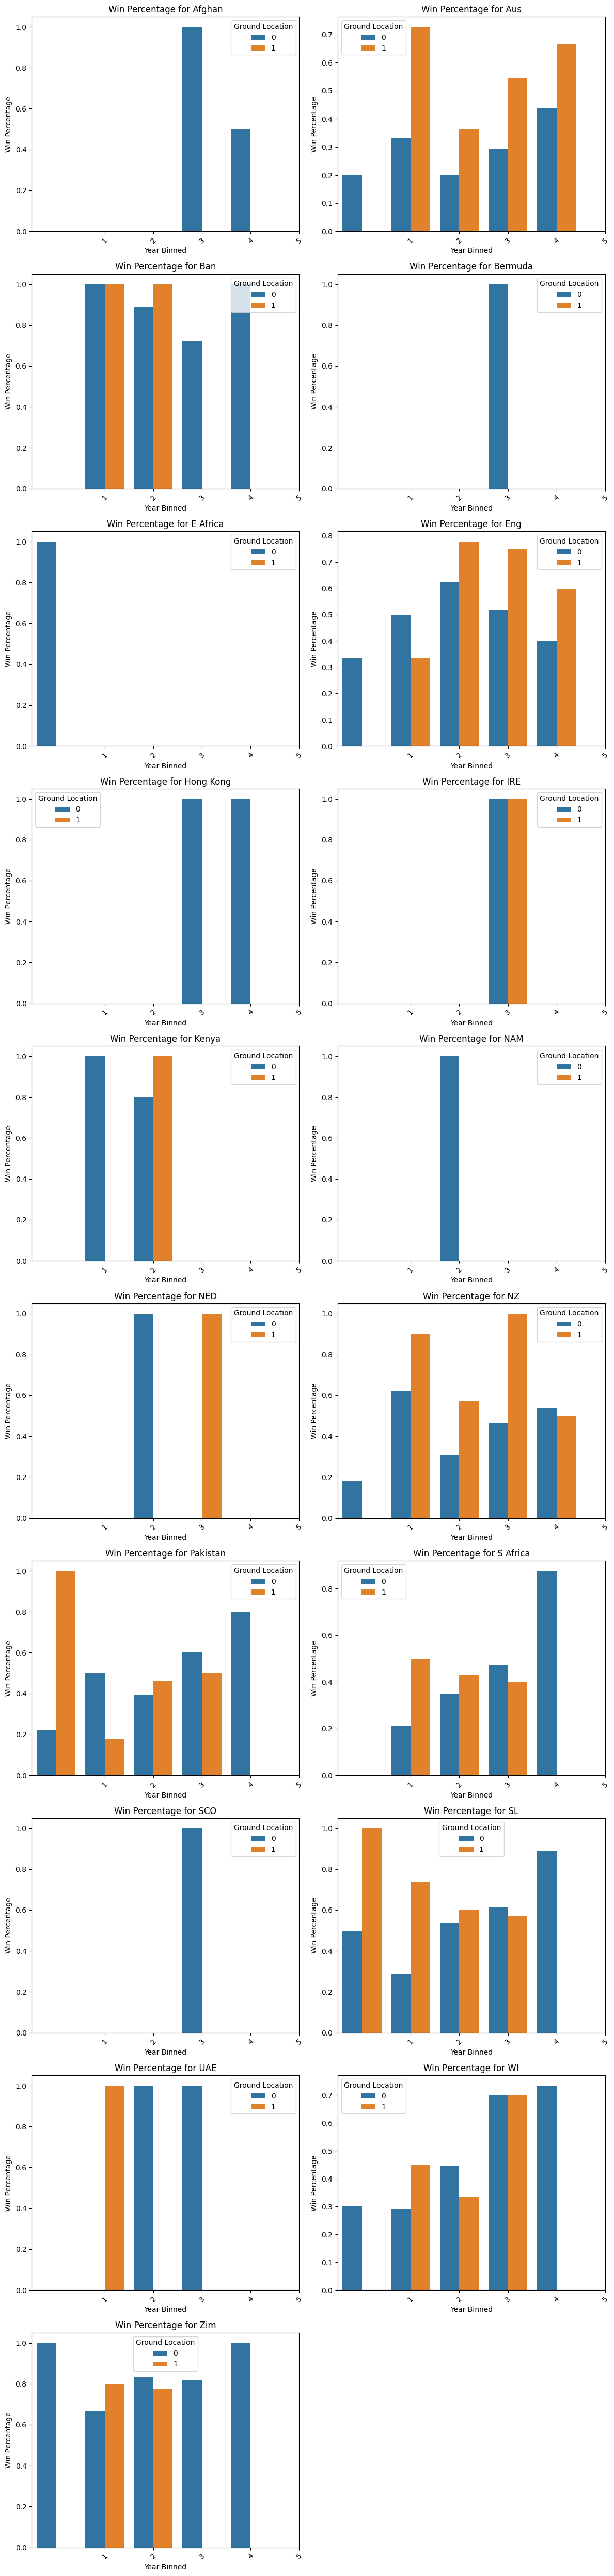

In [ ]:
import numpy as np


# Get unique opponents
opponents = win_by_opponent_and_ground_type['Opponent'].unique()

# Determine number of rows and columns for subplots
num_opponents = len(opponents)
cols = 2  # Number of columns
rows = np.ceil(num_opponents / cols).astype(int)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each opponent and create a bar plot
for i, opponent in enumerate(opponents):
    ax = axes[i]
    opponent_data = win_by_opponent_and_ground_type[win_by_opponent_and_ground_type['Opponent'] == opponent]

    sns.barplot(data=opponent_data, x='Year_binned', y='win_pc', hue='GroundLocation', ax=ax, errorbar=None)

    ax.set_title(f'Win Percentage for {opponent}')
    ax.set_xlabel('Year Binned')
    ax.set_ylabel('Win Percentage')
    ax.legend(title='Ground Location')
    ax.set_xticks(opponent_data['Year_binned'].unique())
    ax.set_xticklabels(opponent_data['Year_binned'].unique(), rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The above set of plots clearly demonstrate how India has dominated Home ODI matches thanks to its crowd and home pitch awareness. Australia and S africa have given some upsets to India.

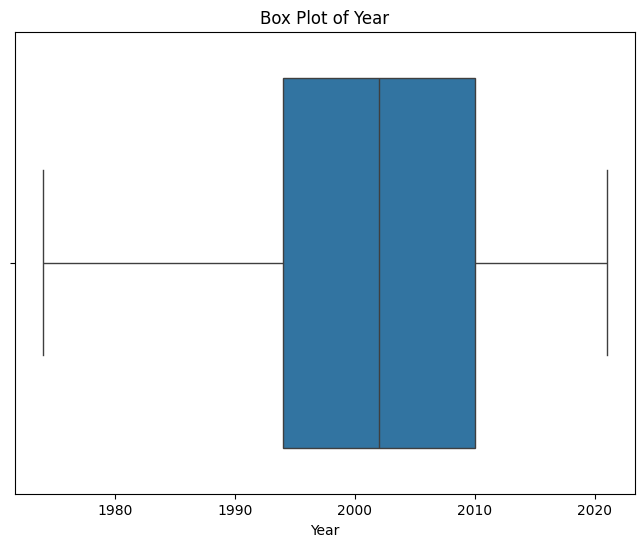

In [ ]:

# Identify outliers using the IQR method for numerical columns
for column in df0.select_dtypes(include=np.number):
  Q1 = df0[column].quantile(0.25)
  Q3 = df0[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df0[(df0[column] < lower_bound) | (df0[column] > upper_bound)]
  if not outliers.empty:
    print(f"Outliers found in column '{column}':")
    print(outliers)


# You can also use visualization techniques like box plots to identify outliers.
# For example, for 'Year':
plt.figure(figsize=(8, 6))
sns.boxplot(x=df0['Year'])
plt.title('Box Plot of Year')
plt.show()




The above box plot indicates that Most matches played are bw 1995 and 2010

In [ ]:
win_per_by_each_year = df0.groupby("Year")["outcome"].mean().reset_index()
win_per_by_each_year.rename(columns={"outcome": "win_pc"}, inplace=True)

In [ ]:
win_per_by_each_year.head()

,Year,win_pc
0,1974,0.000000
1,1975,0.333333
2,1976,0.000000
3,1978,0.333333
4,1979,0.000000


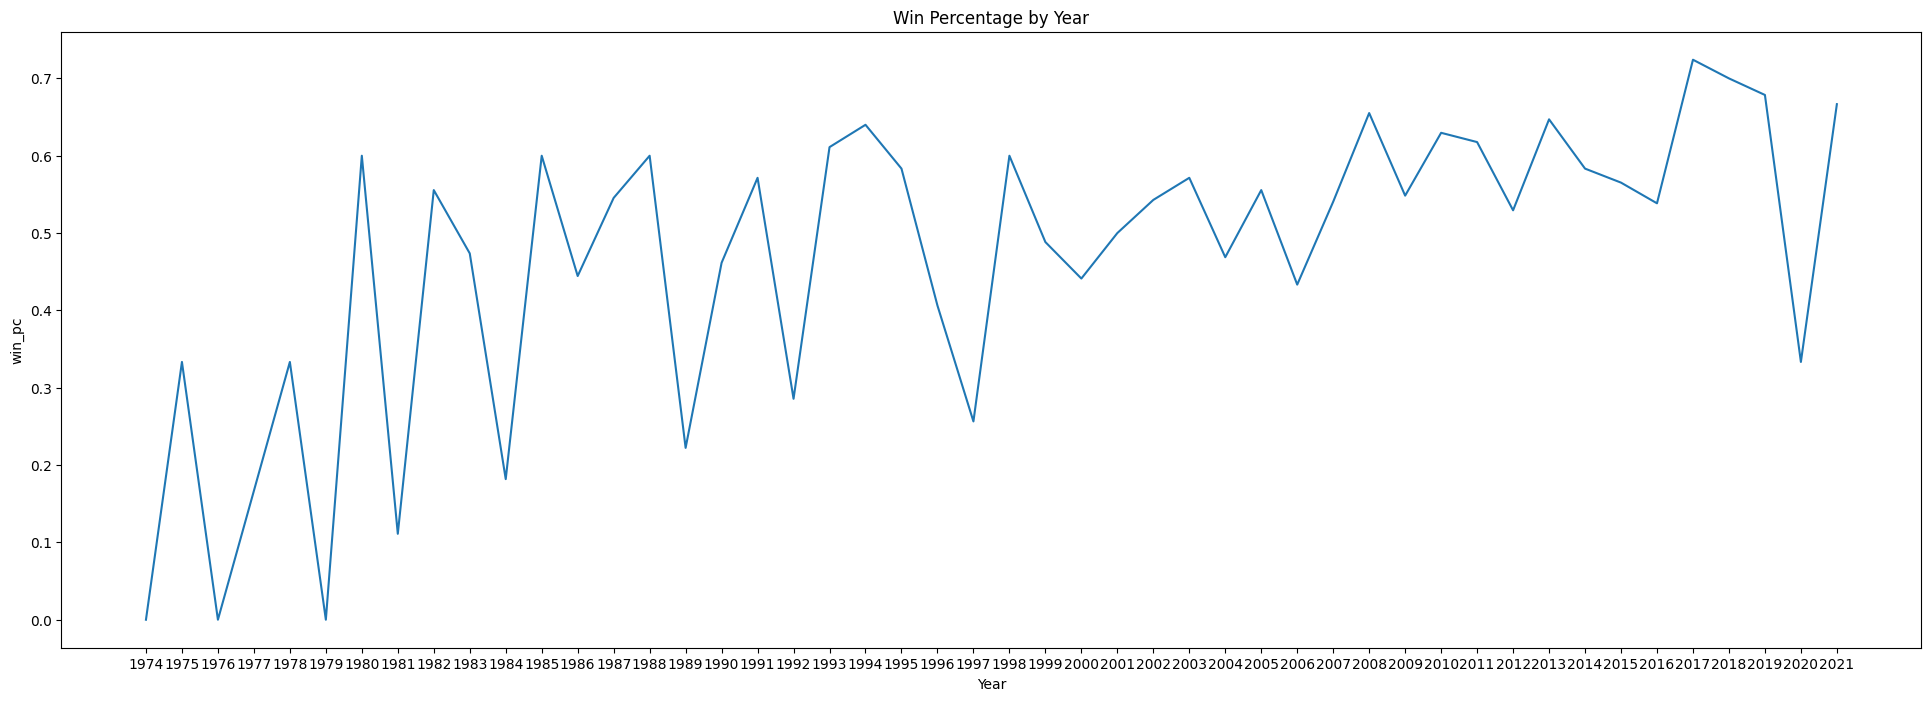

In [ ]:
plt.figure(figsize=(24, 8))
sns.lineplot(x=win_per_by_each_year["Year"] ,  y=win_per_by_each_year["win_pc"] )
plt.title("Win Percentage by Year")
plt.xticks(ticks=range(min(win_per_by_each_year["Year"]), 2022, 1));
plt.show()

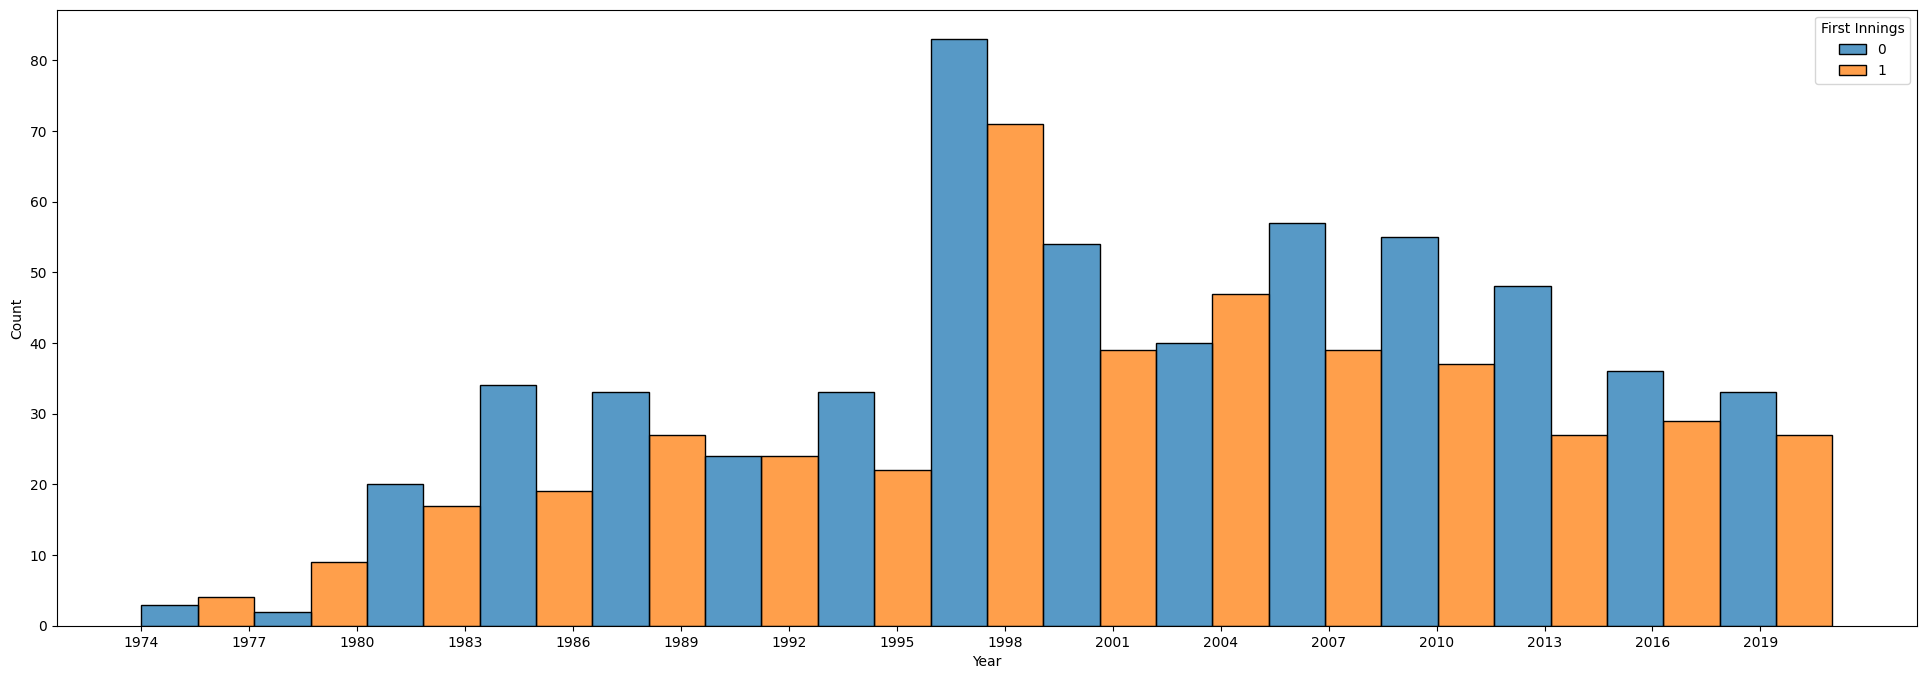

In [ ]:
plt.figure(figsize=(24, 8))
sns.histplot(x = df0["Year"] , hue=df0["First Innings"] , multiple = "dodge")
plt.xticks(ticks=range(min(df0["Year"]), 2022, 3));

The graph illustrates how India has always favoured itself to bowl first , and wanting to chase the targets.

<Axes: xlabel='Year', ylabel='outcome'>

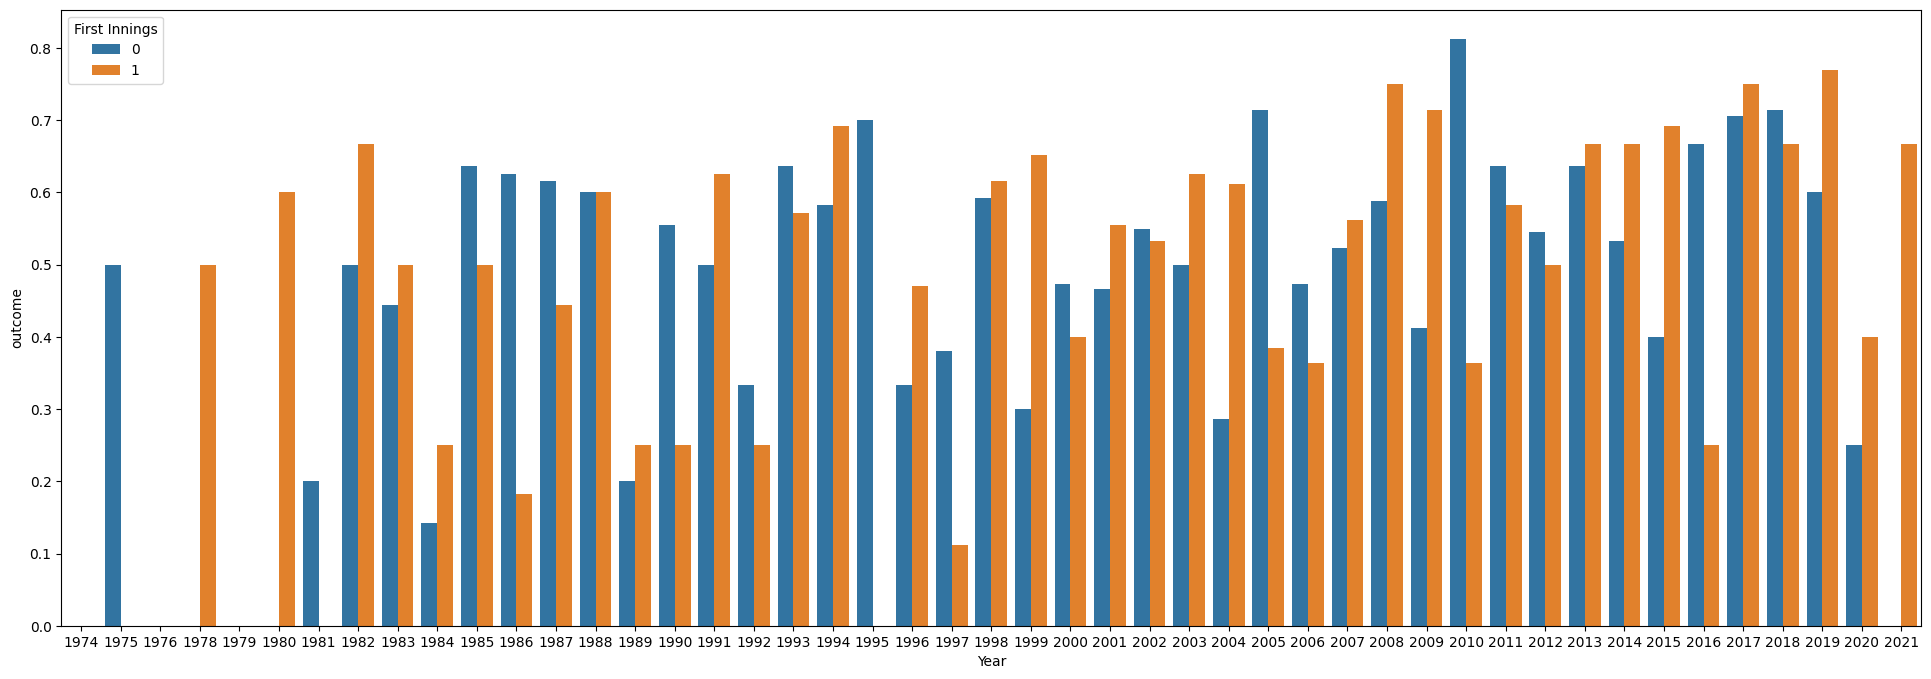

In [ ]:
plt.figure(figsize=(24, 8))
win = df0.groupby(["Year" ,"First Innings"])["outcome"].mean().reset_index()
sns.barplot(x= win["Year"],  y=win["outcome"] , hue=win["First Innings"] )

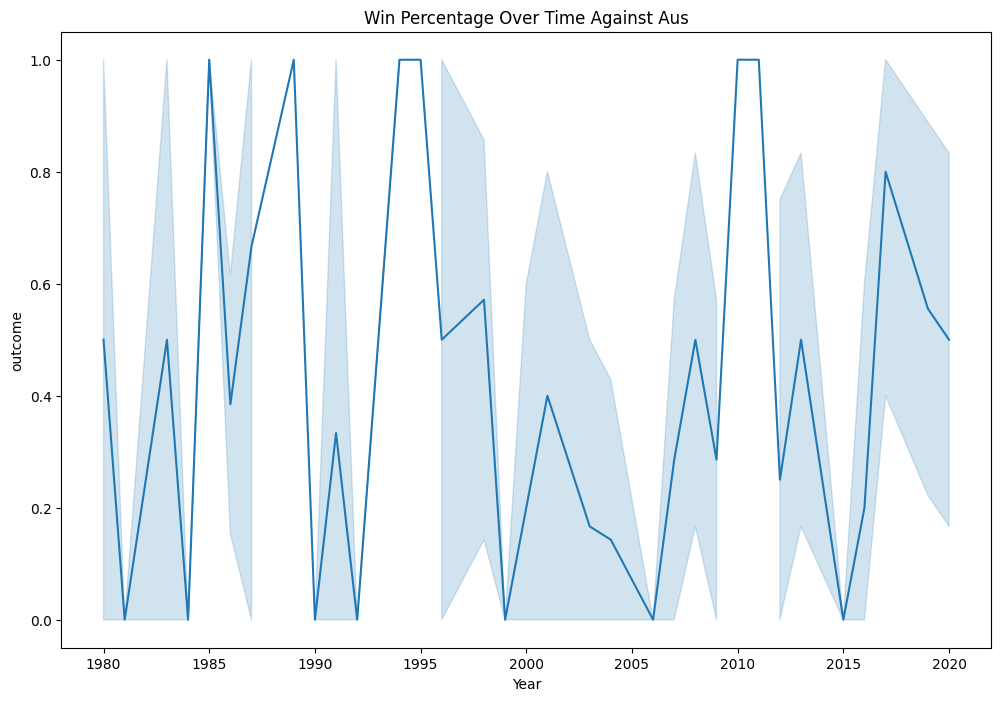

In [ ]:
team = 'Aus'  # Replace with any team
df_team = df0[df0['Opponent'] == team]
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='outcome', data=df_team)
plt.title(f'Win Percentage Over Time Against {team}')
plt.show()

India's choice of bowling first works well as they have won most matches bowling first.

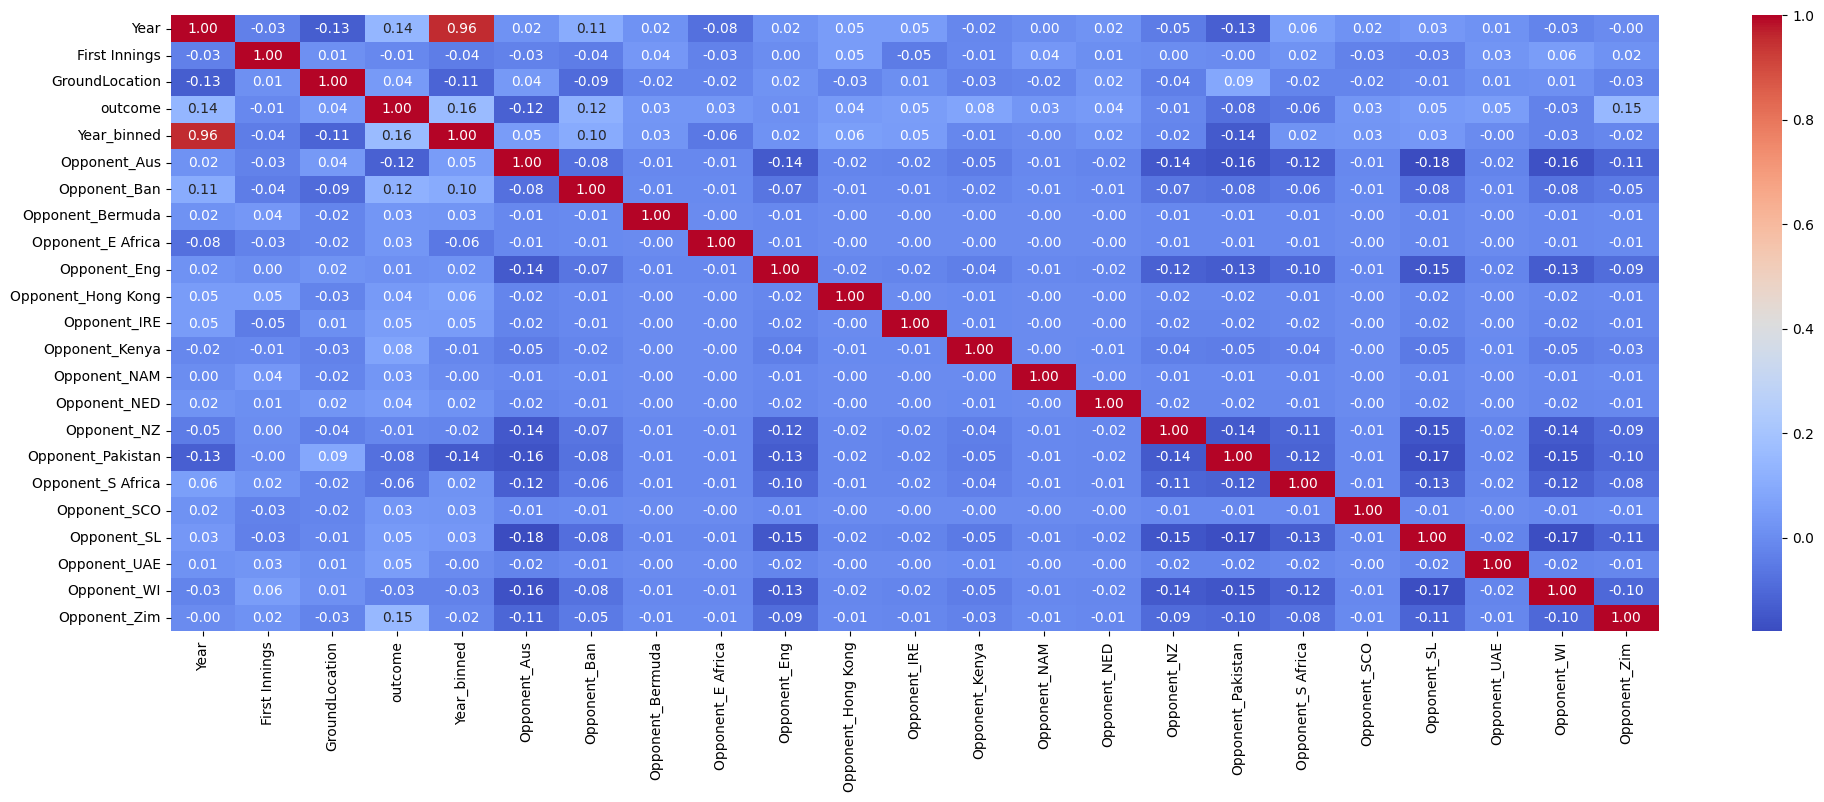

In [ ]:
df_encoded = pd.get_dummies(df0, columns=['Opponent'], drop_first=True)

# Now you can compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

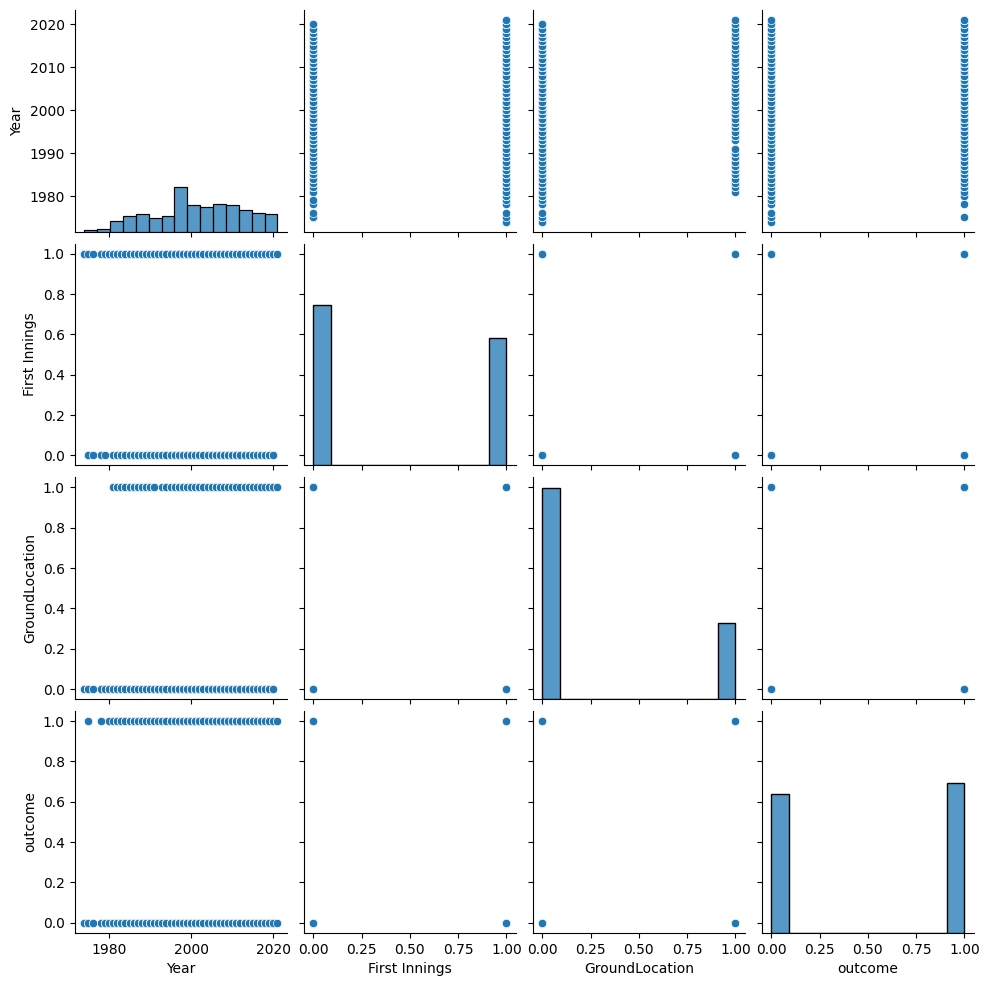

In [ ]:
sns.pairplot(df0)
plt.show()

In conclusion, the exploratory data analysis (EDA) of India's ODI cricket history has provided valuable insights into the team's trajectory and the changing landscape of the format. Through feature engineering, data cleaning, and comprehensive data analysis, we utilized various visualization techniques, including histograms, line plots, bar plots, box plots, and heatmaps, to uncover patterns and trends in performance metrics.

The histograms effectively illustrated the distribution of key statistics, while line plots showcased the progression of India's performance over the decades. Bar plots highlighted the dominance against major cricketing nations, particularly in home matches. Box plots helped in identifying the variability in match outcomes and performance metrics, while heatmaps provided a visual representation of correlations between different variables.

Despite India's ascent as a cricketing powerhouse, the EDA also highlighted the challenges posed by the declining popularity of ODIs due to the rise of T20I cricket. The reduced frequency of marquee matchups, especially against Pakistan, and the emergence of teams like Scotland, Ireland, and Afghanistan indicate a shifting focus within the sport. This comprehensive analysis underscores the need for strategic adaptations to ensure ODI cricket remains relevant and engaging in the evolving cricketing landscape.